# EDA on Crime Dataset (Spring 2025 - updated 1/24/2025)
--------------------------------
**Dr. Dave Wanik - Department of Operations and Information Management - University of Connecticut**




* **Varsha Musku**
* **3157361**



In [3]:
# import modules
import pandas as pd
import numpy as np

# Introduction

Whenever I start a class off, I like to make sure that students have basic EDA chops in Python. This semester I picked a structured time series dataset from Wikipedia which tracks violent crime per State over a few years. This homework tests your skill at using data to tell a story about crime in the US. Good luck!

![crime map from Wiki](https://upload.wikimedia.org/wikipedia/commons/5/51/Violent_Crime_Rate_by_U.S._state.svg)

In [4]:
# Reading the data List of US states and Territories by Violent crime
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate')[1]
print(df.head())
print(df.shape)

               Location   2018    2019   2020   2021   2022
0         United States  383.4   380.8  398.5  387.0  380.7
1  District of Columbia  997.1  1045.2  999.8  951.3  812.3
2            New Mexico  842.8   824.0  778.3  820.8  780.5
3                Alaska  891.7   865.0  837.8  759.1  758.9
4              Arkansas  561.6   580.8  671.9  702.4  645.3
(52, 6)


# Q1. Delete values where Location is equal to 'United States' or 'District of Columbia'
We just want to focus on the 50 States.

In [5]:
# Deleting the States - 'United States' or 'District of Columbia'
df = df[(df['Location'] != 'United States') & (df['Location'] != 'District of Columbia')]
df.head()

,Location,2018,2019,2020,2021,2022
2,New Mexico,842.8,824.0,778.3,820.8,780.5
3,Alaska,891.7,865.0,837.8,759.1,758.9
4,Arkansas,561.6,580.8,671.9,702.4,645.3
5,Louisiana,543.3,559.7,639.4,662.7,628.6
6,Tennessee,630.4,598.9,672.7,671.8,621.6


In [18]:
df.columns

Index(['Location', '2018', '2019', '2020', '2021', '2022'], dtype='object')

# Q2. What is the shape of the dataframe?


The dataset now has 50 rows and 6 columns, which is as expected after filtering to include only the 50 U.S. states.
Prior to removing the 2 rows corresponding to other territories, the shape of the dataset was (52, 6).


In [6]:
print("The number of Rows and columns of the dataset are : ",df.shape)


The number of Rows and columns of the dataset are :  (50, 6)


# Q3. Count the number of missing values per column, then print a list of unique values within the State/territory column.

Below are the unique Values within the State/territory column in the dataset, and all columns have been checked to contain no missing values.


In [7]:
# Checking if any columns having missing values and unique values of location column

print("Missing values per column",df.isnull().sum())
print("Unique values in location column : ",df['Location'].unique())

Missing values per column Location    0
2018        0
2019        0
2020        0
2021        0
2022        0
dtype: int64
Unique values in location column :  ['New Mexico' 'Alaska' 'Arkansas' 'Louisiana' 'Tennessee' 'California'
 'Colorado' 'South Carolina' 'Missouri' 'Michigan' 'Nevada' 'Texas'
 'Arizona' 'New York' 'Oklahoma' 'Montana' 'Kansas' 'Alabama'
 'North Carolina' 'Maryland' 'Delaware' 'South Dakota' 'Washington'
 'Georgia' 'Oregon' 'Massachusetts' 'Indiana' 'Wisconsin' 'Ohio'
 'Illinois' 'Iowa' 'Nebraska' 'Minnesota' 'Pennsylvania' 'North Dakota'
 'West Virginia' 'Hawaii' 'Florida' 'Mississippi' 'Utah' 'Idaho'
 'Virginia' 'Vermont' 'Kentucky' 'New Jersey' 'Wyoming' 'Rhode Island'
 'Connecticut' 'New Hampshire' 'Maine']


# Q4. Which State had the highest and lowest 'Violent crime' rate in 2020? How about in 2022?

The output indicates that the violent crime rate in Maine remained the same in both 2020 and 2022. However, the state with the highest violent crime rate in 2020 was Alaska, whereas in 2022, it was New Mexico.

In [8]:
df = df.set_index('Location')
df.head()

,2018,2019,2020,2021,2022
Location,,,,,
New Mexico,842.8,824.0,778.3,820.8,780.5
Alaska,891.7,865.0,837.8,759.1,758.9
Arkansas,561.6,580.8,671.9,702.4,645.3
Louisiana,543.3,559.7,639.4,662.7,628.6
Tennessee,630.4,598.9,672.7,671.8,621.6


In [9]:
# Caluclating the Lowest and highest violent crime in 2020
min_state_2020 = df['2020'].idxmin()
max_state_2020 = df['2020'].idxmax()
print("Lowest Violent Crime Rate in 2020",min_state_2020,df.loc[min_state_2020,'2020'])
print("Highest Violent Crime Rate in 2020",max_state_2020,df.loc[max_state_2020,'2020'])

# Caluclating the Lowest and highest violent crime in 2022

min_state_2022 = df['2022'].idxmin()
max_state_2022 = df['2022'].idxmax()
print("Lowest Violent Crime Rate in 2022",min_state_2022,df.loc[min_state_2022,'2022'])
print("Highest Violent Crime Rate in 2022",max_state_2022,df.loc[max_state_2022,'2022'])


Lowest Violent Crime Rate in 2020 Maine 108.6
Highest Violent Crime Rate in 2020 Alaska 837.8
Lowest Violent Crime Rate in 2022 Maine 103.3
Highest Violent Crime Rate in 2022 New Mexico 780.5


# Q5. Make a line plot that shows the trend of violent crime in Alaska.
One plot for each State. X = year and Y = violent crime. Have nice titles, axes and a unique color for each plot. Note that this question probably requires you to take the transpose or to create a pivot table (your choice.)

In [10]:
df.head()

,2018,2019,2020,2021,2022
Location,,,,,
New Mexico,842.8,824.0,778.3,820.8,780.5
Alaska,891.7,865.0,837.8,759.1,758.9
Arkansas,561.6,580.8,671.9,702.4,645.3
Louisiana,543.3,559.7,639.4,662.7,628.6
Tennessee,630.4,598.9,672.7,671.8,621.6


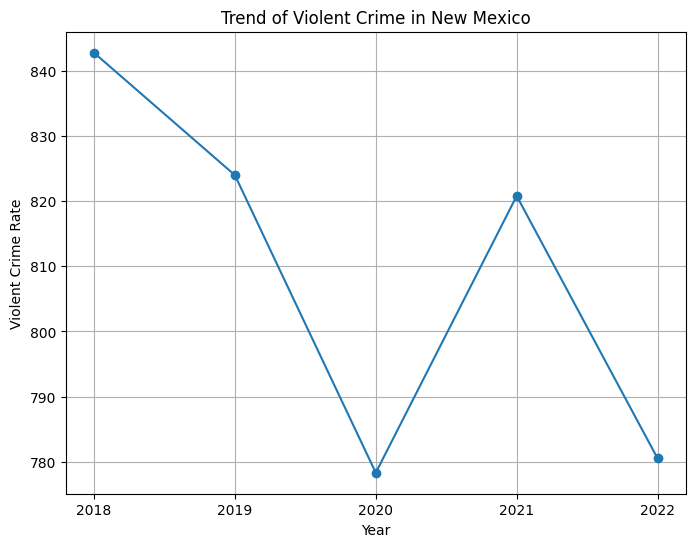

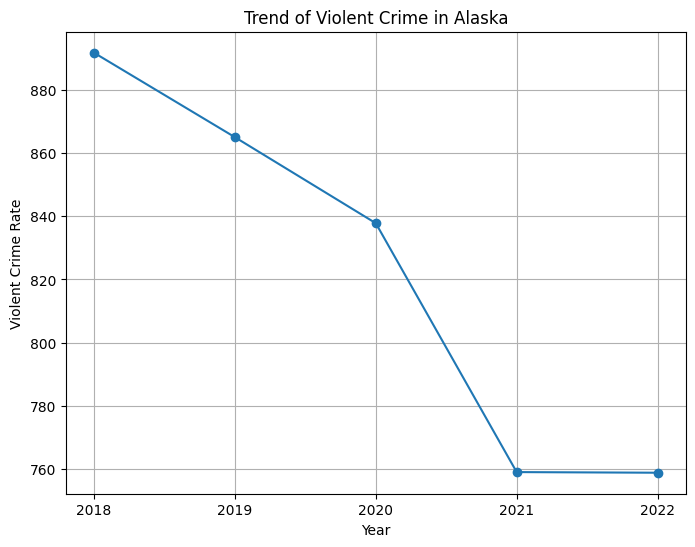

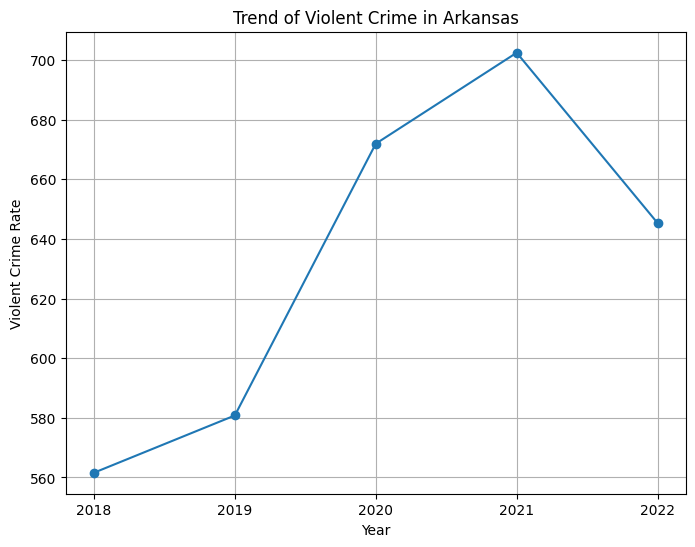

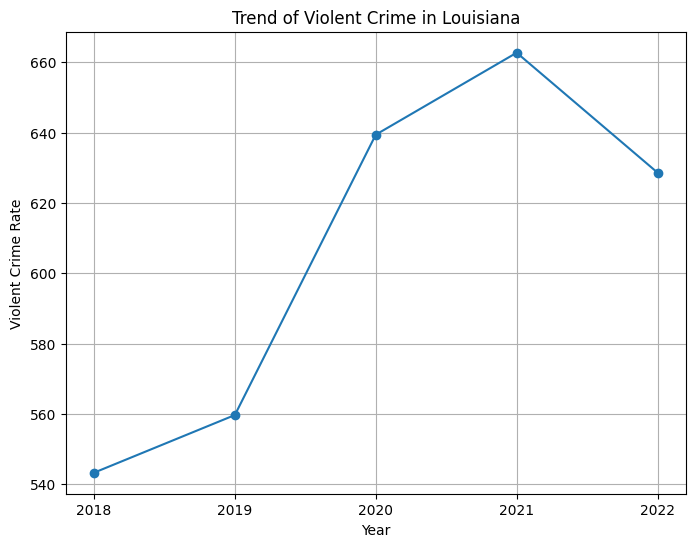

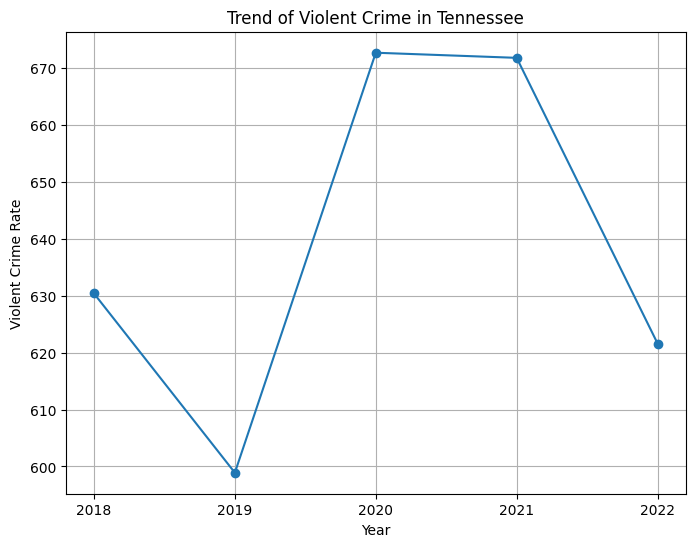

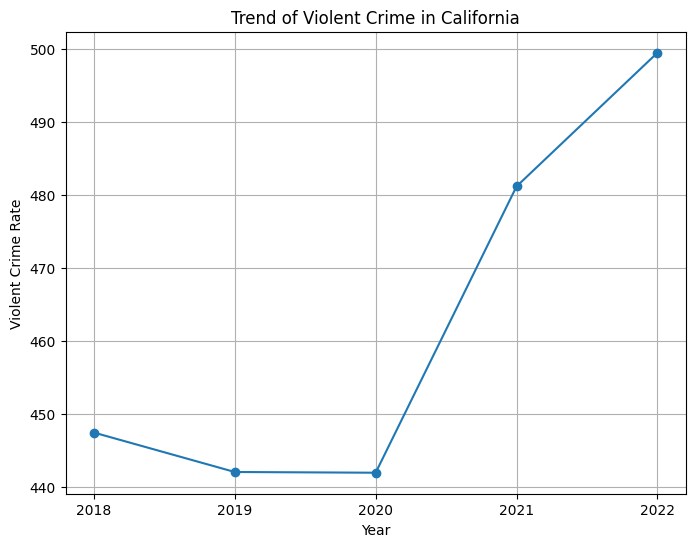

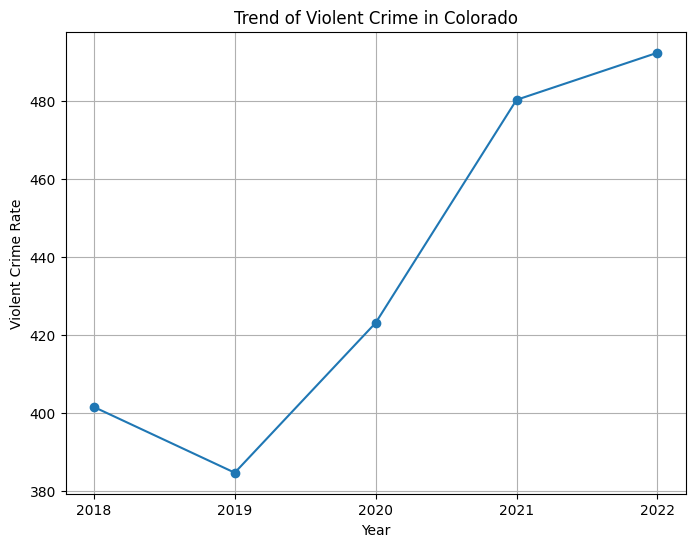

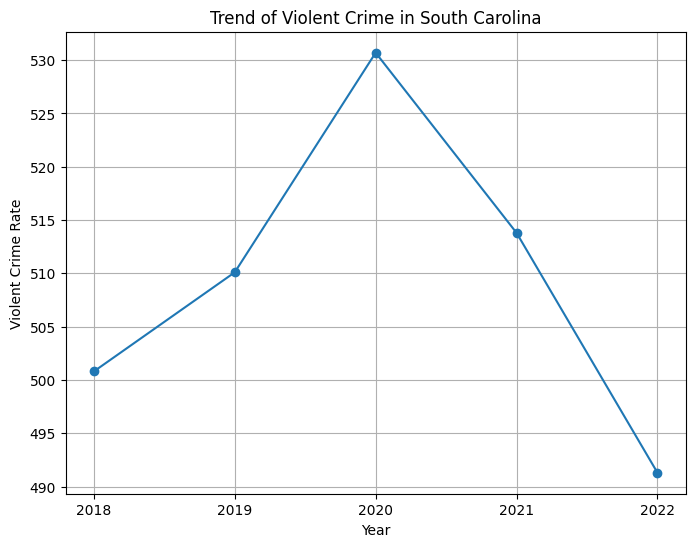

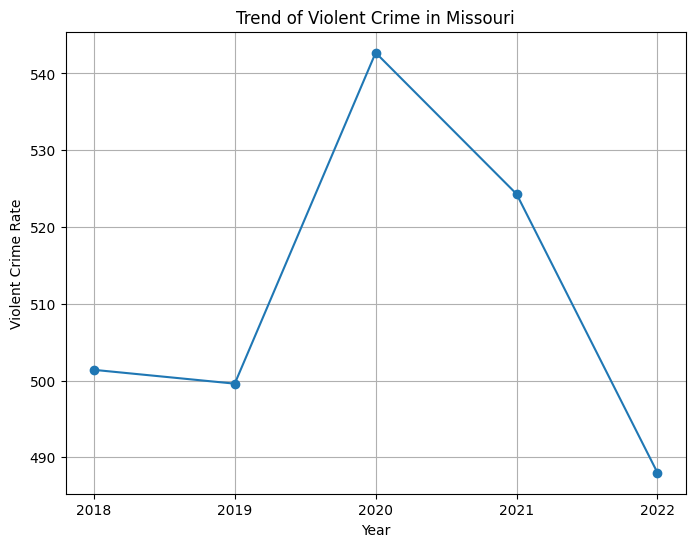

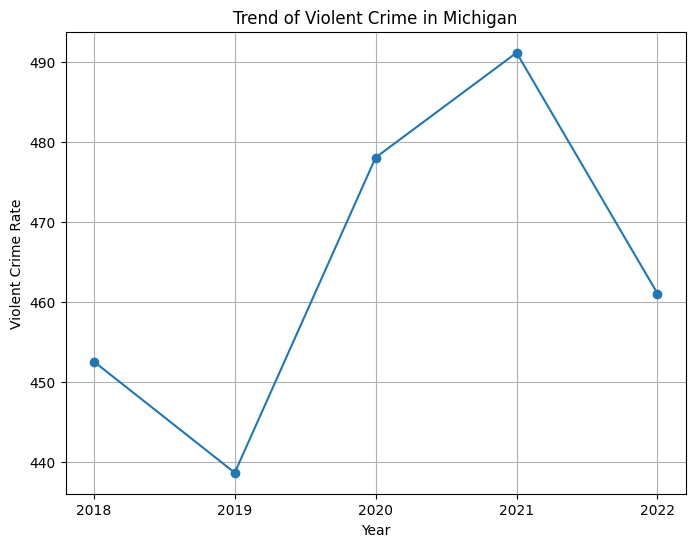

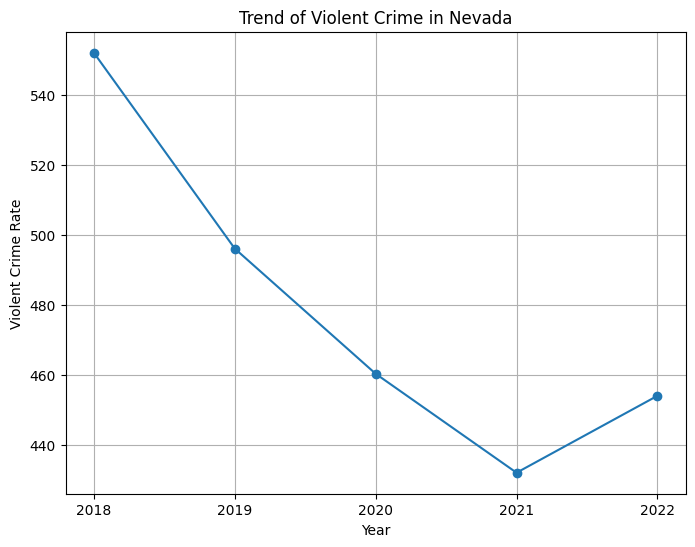

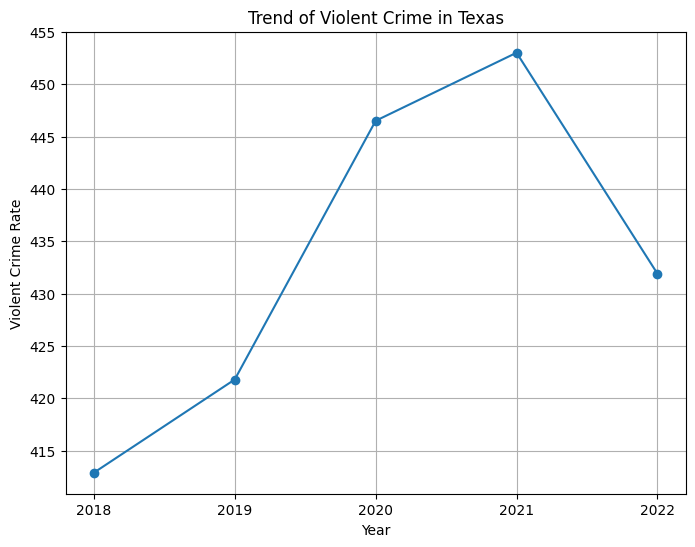

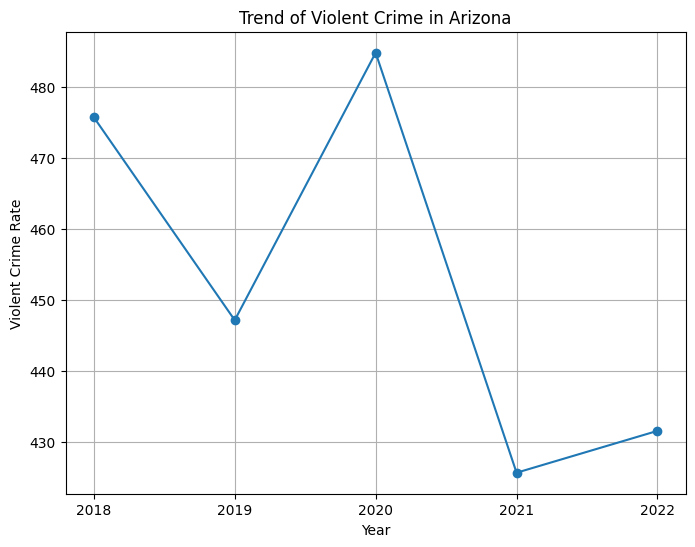

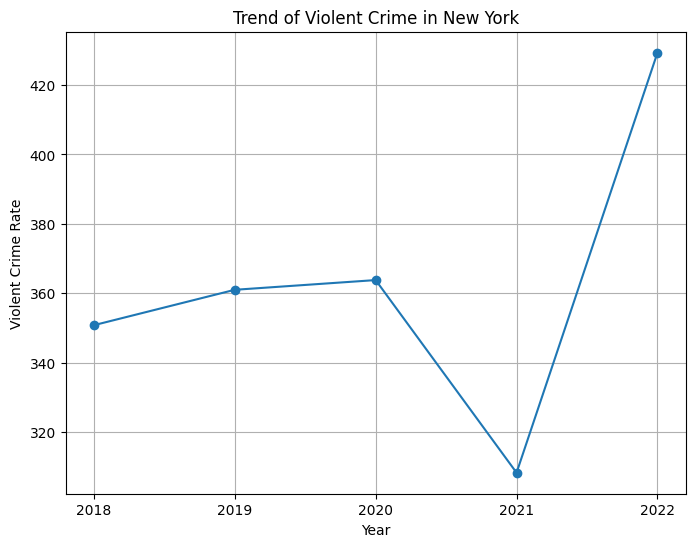

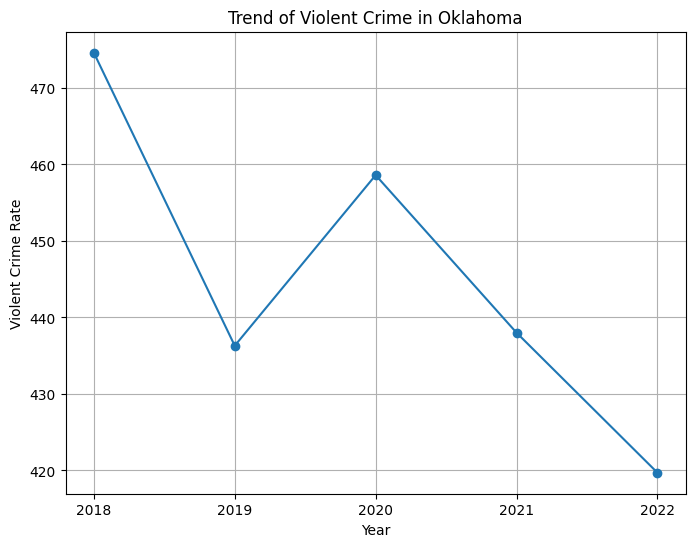

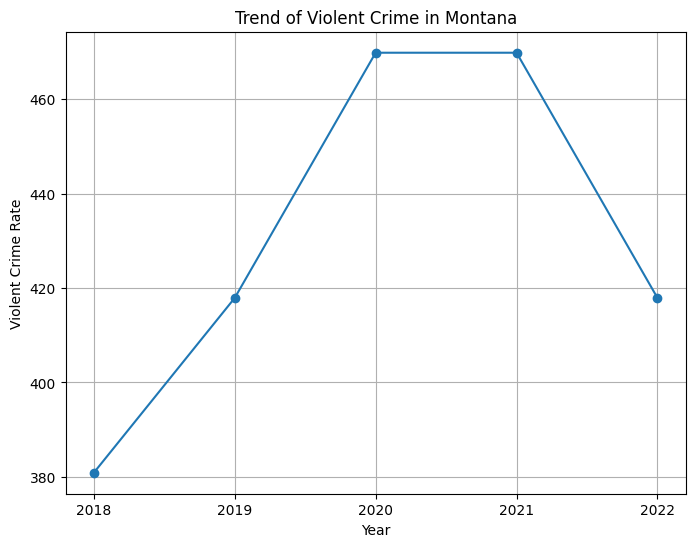

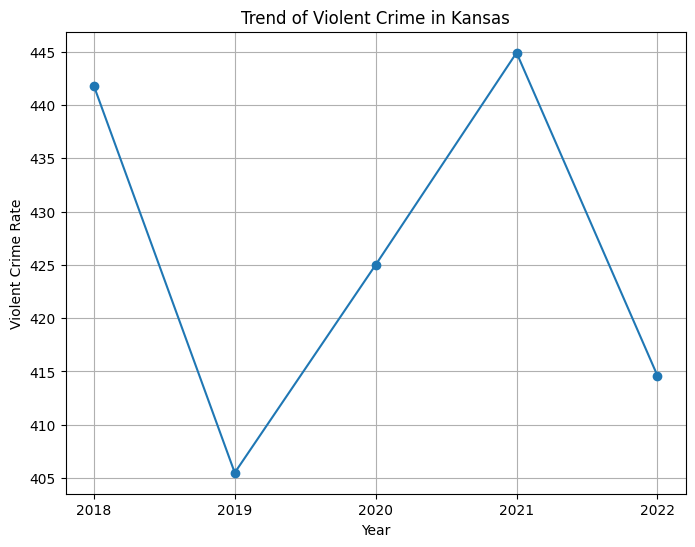

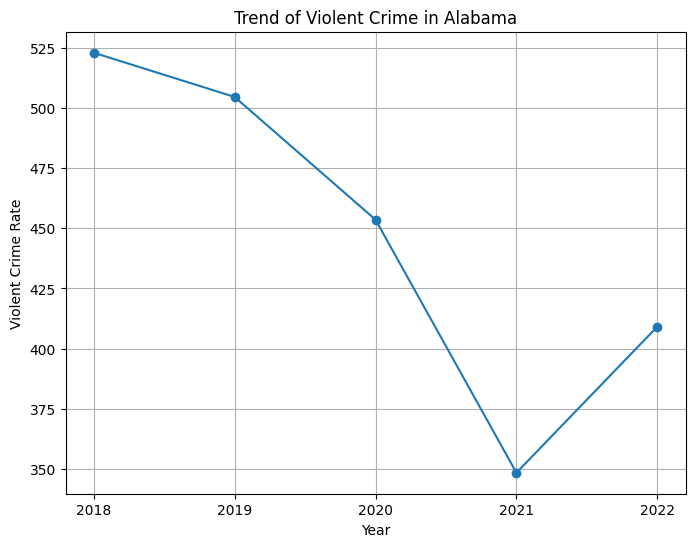

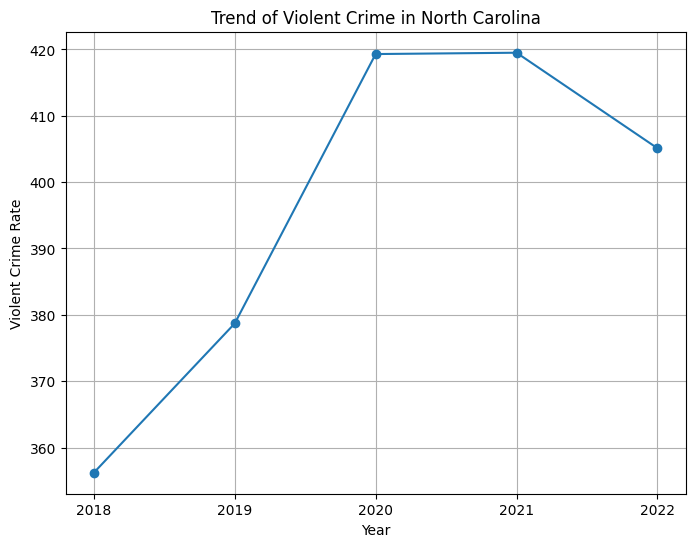

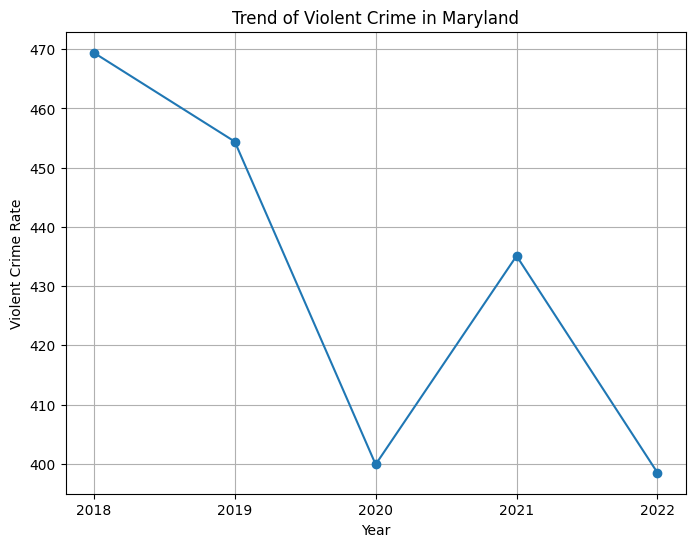

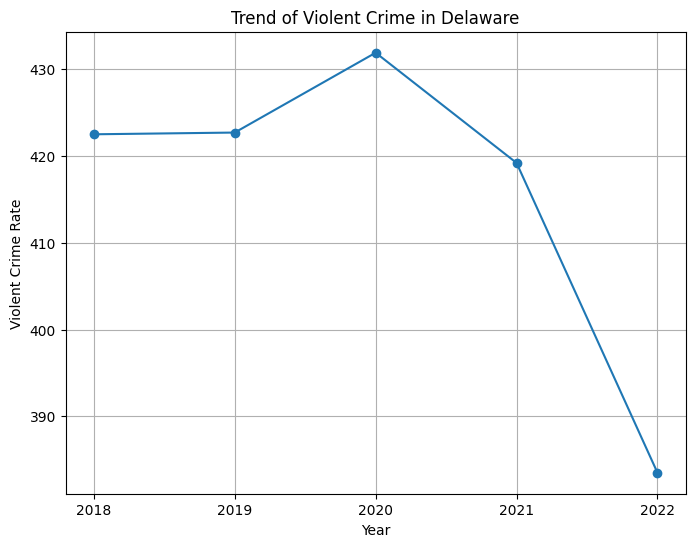

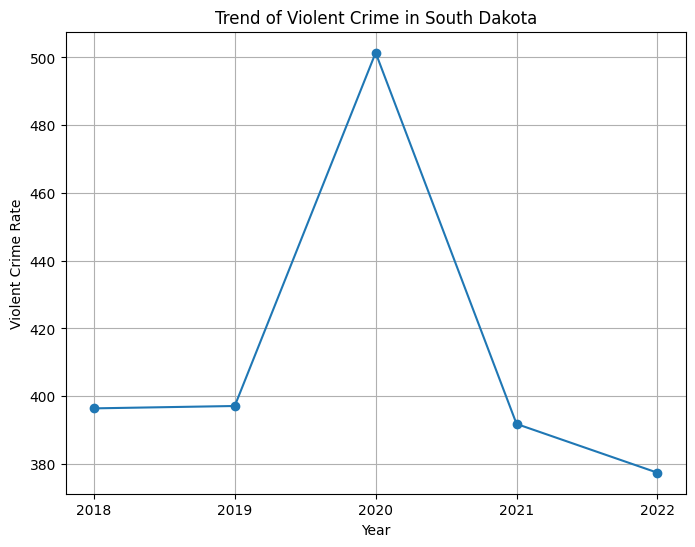

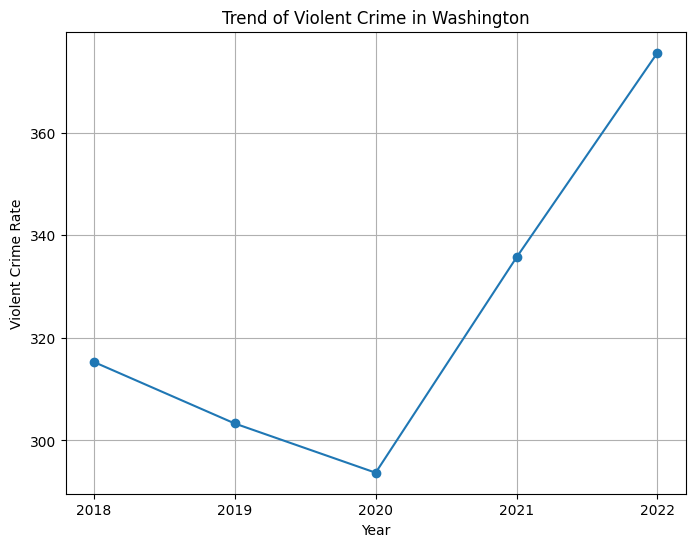

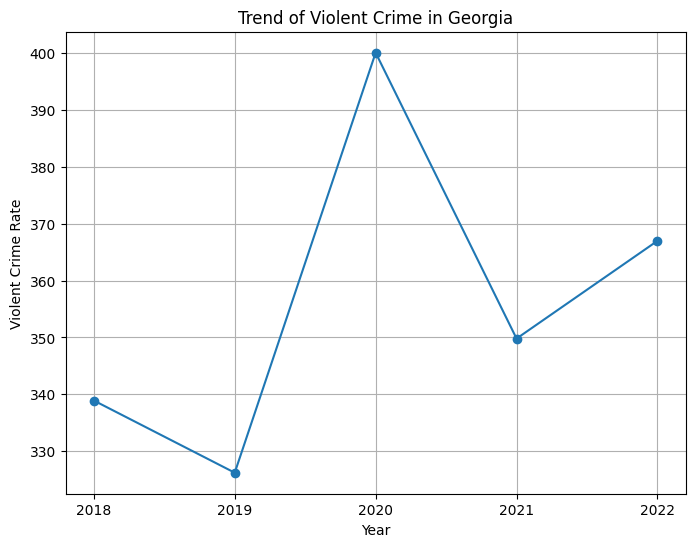

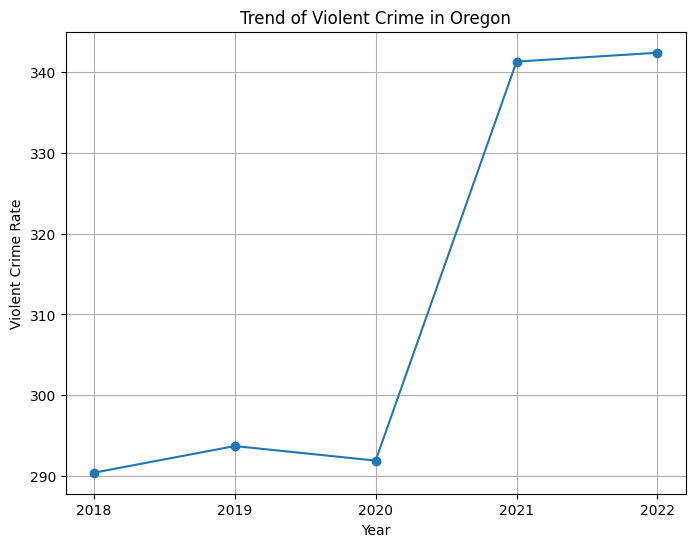

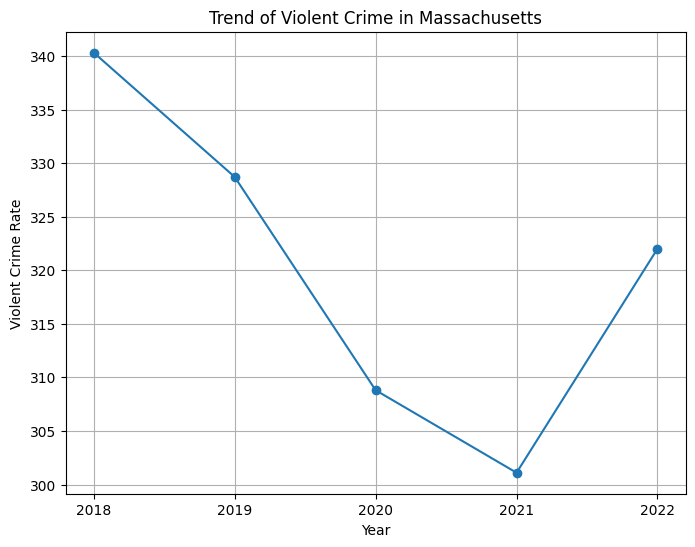

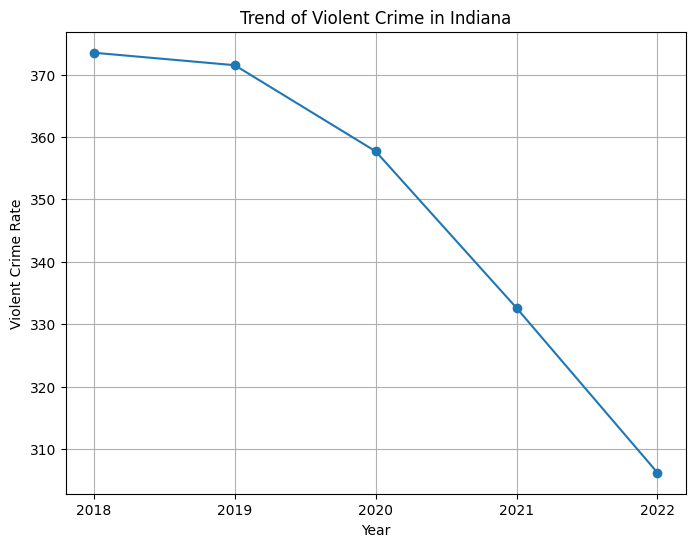

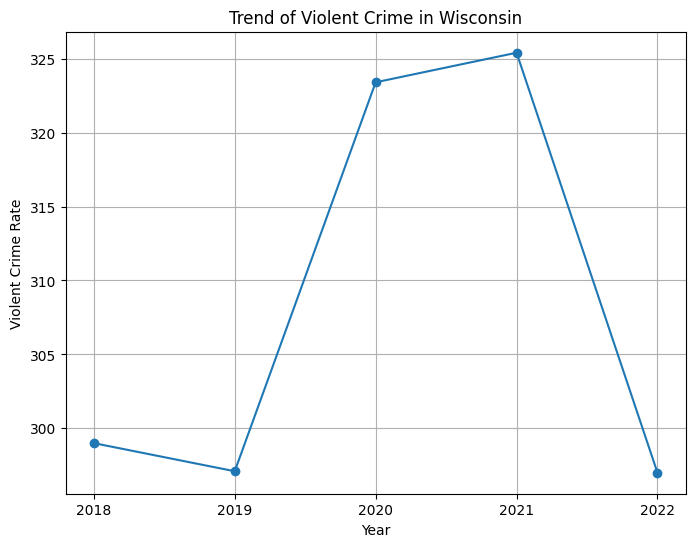

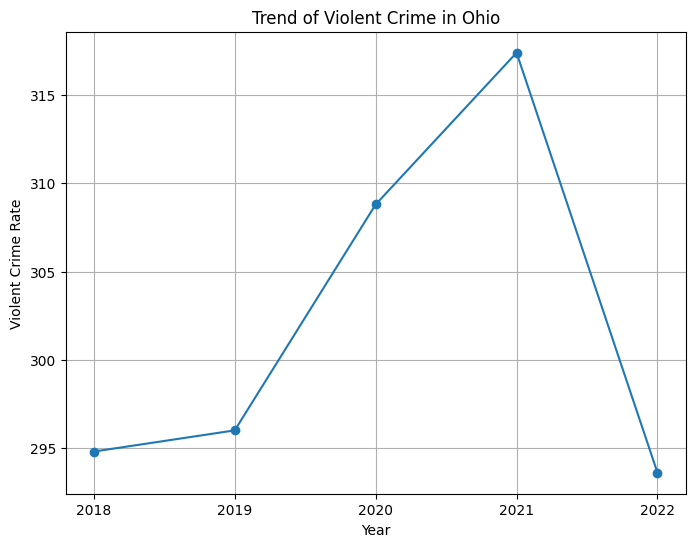

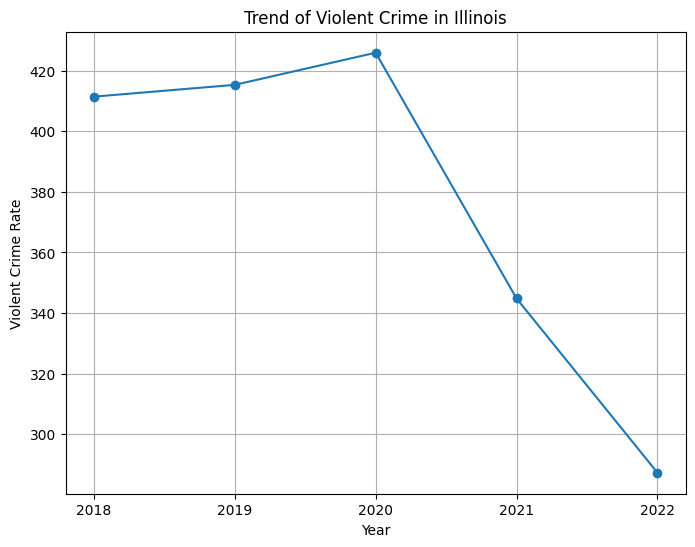

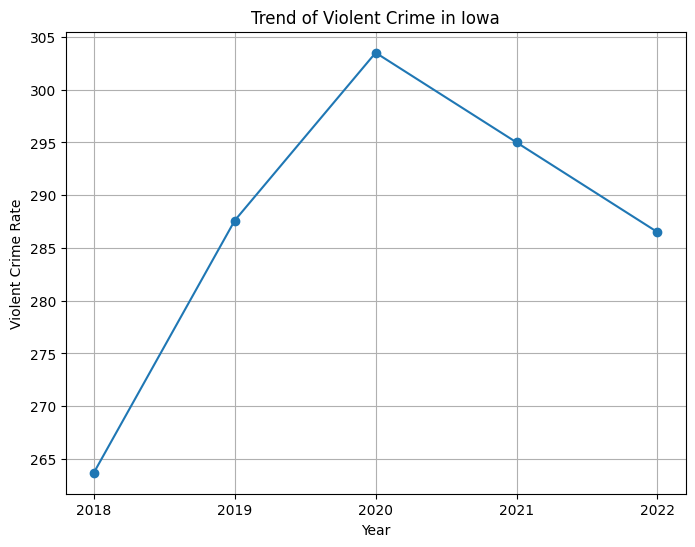

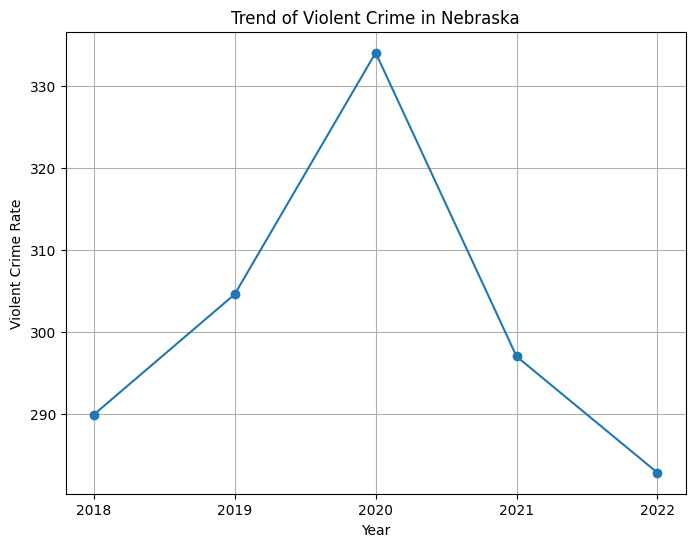

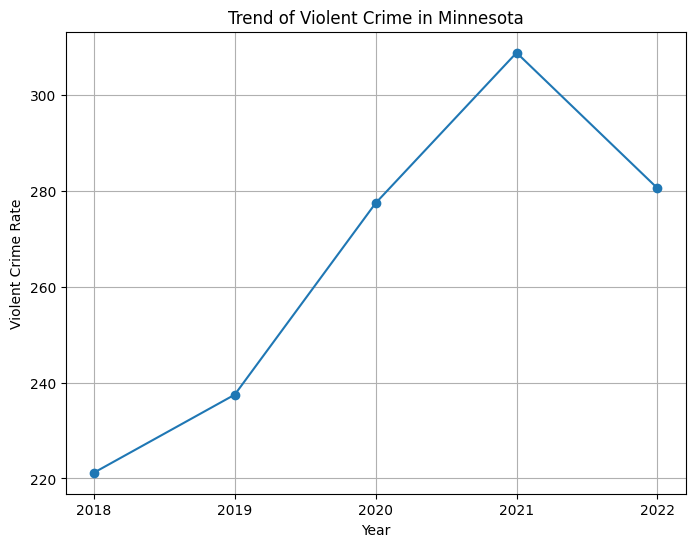

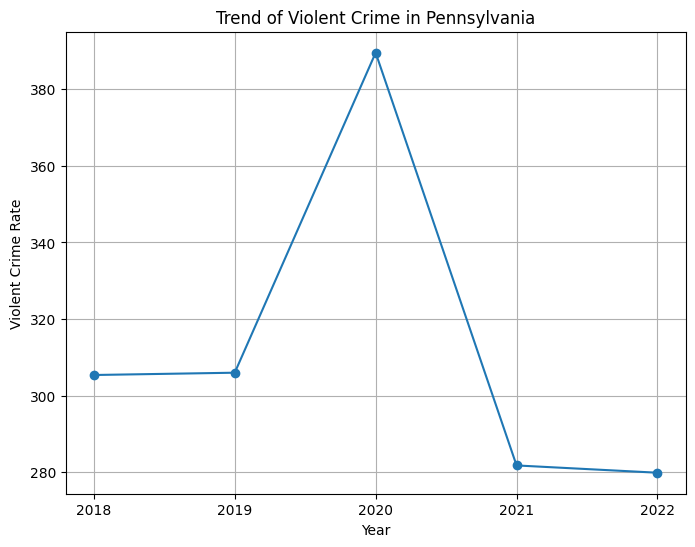

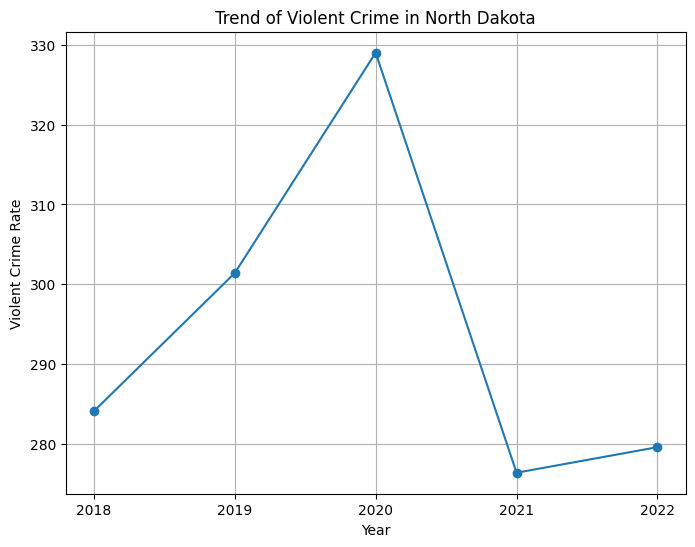

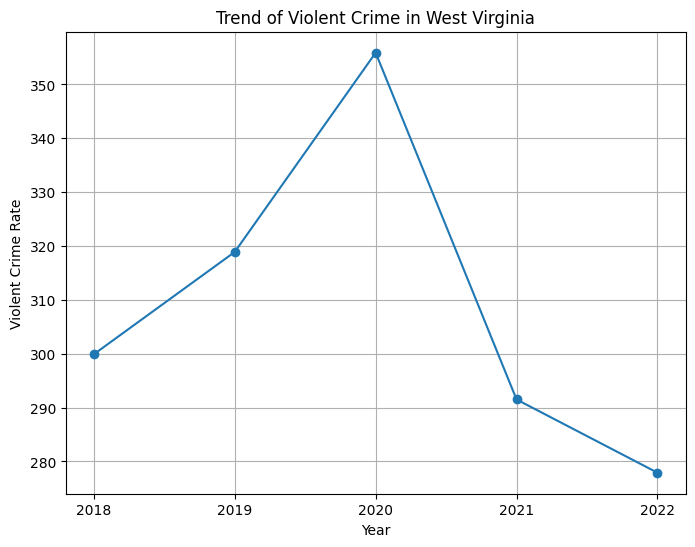

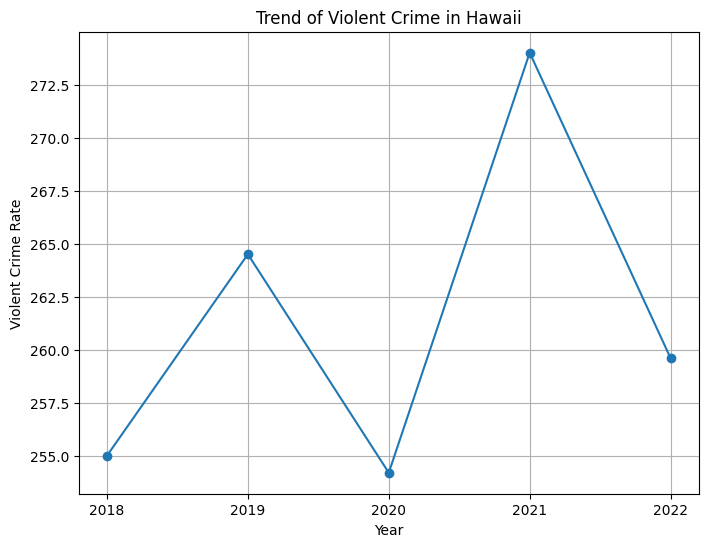

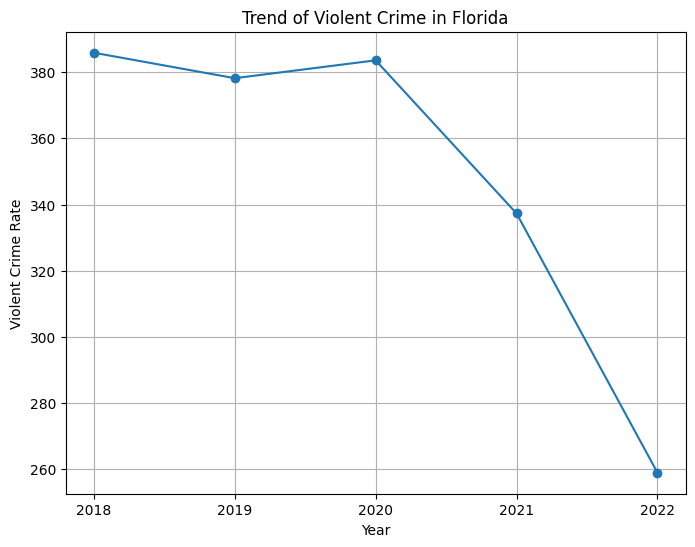

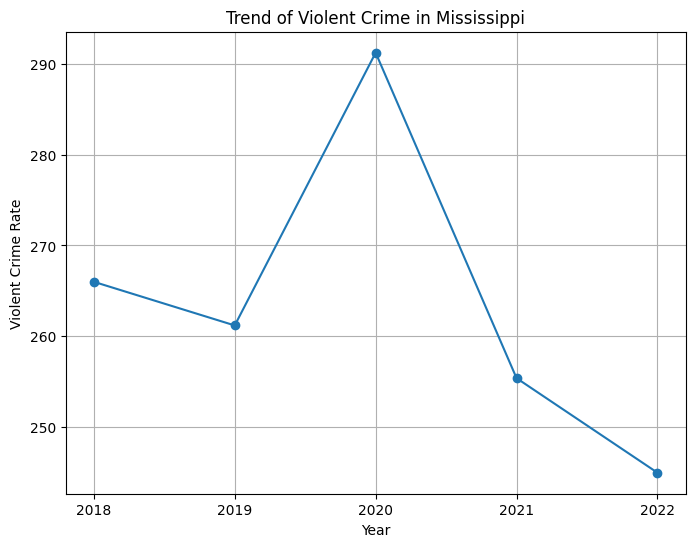

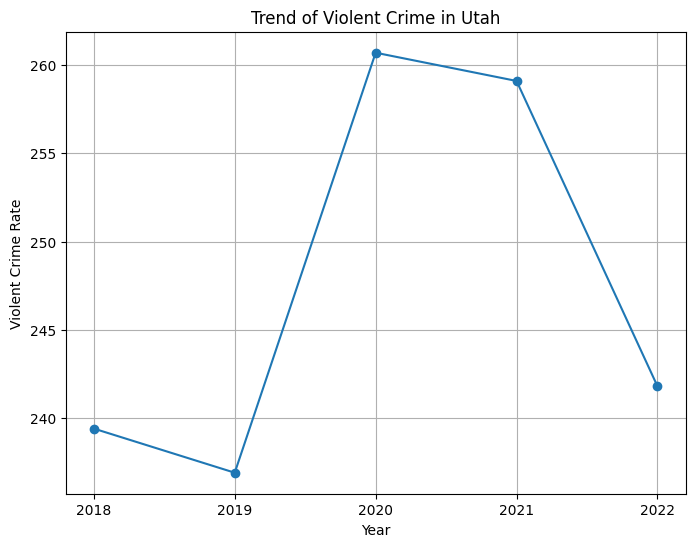

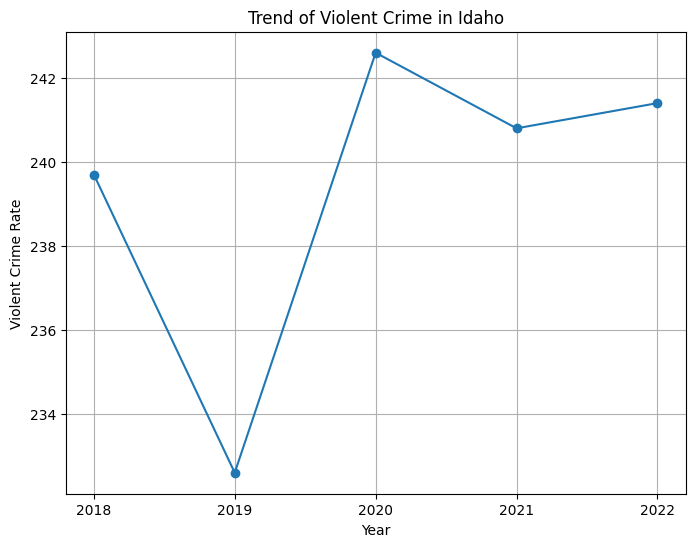

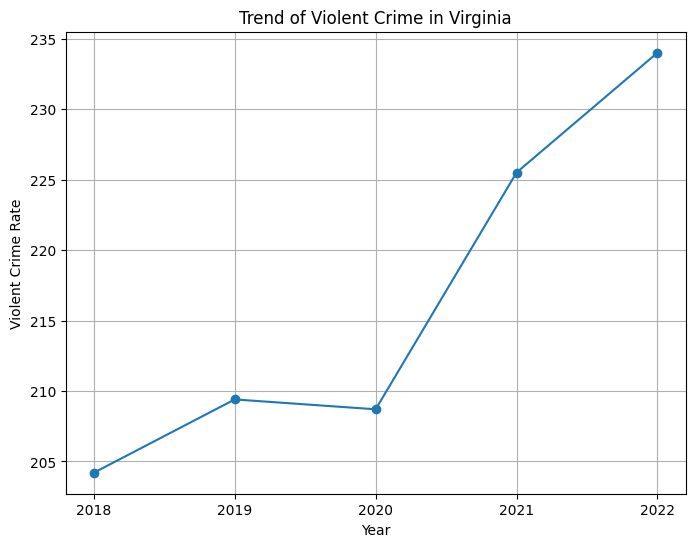

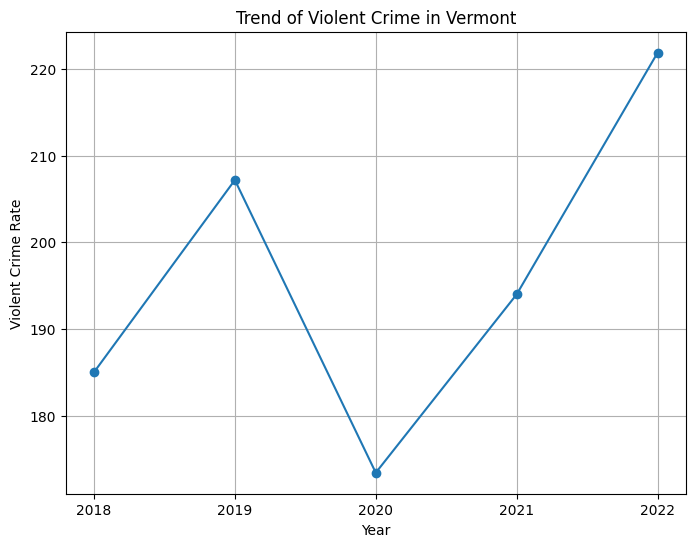

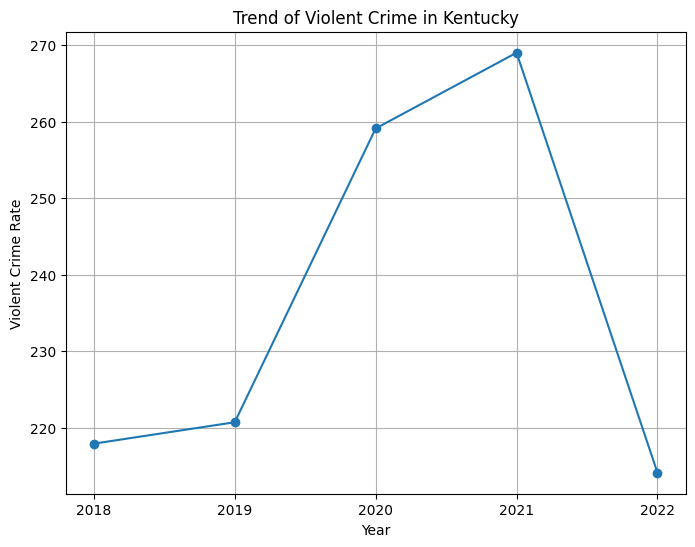

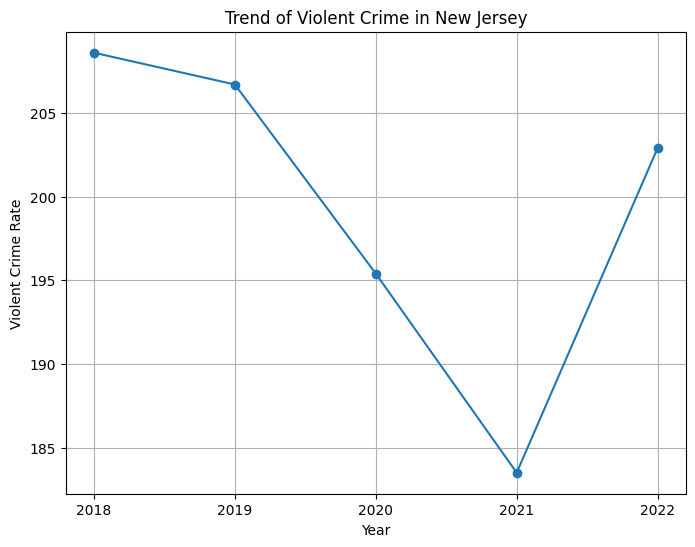

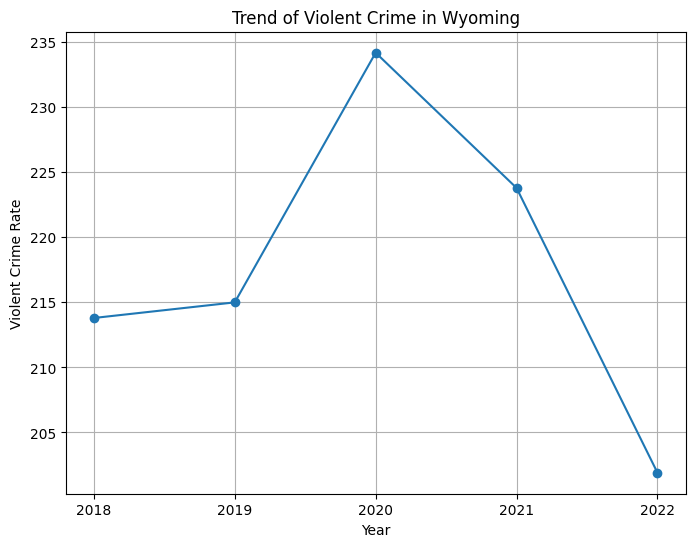

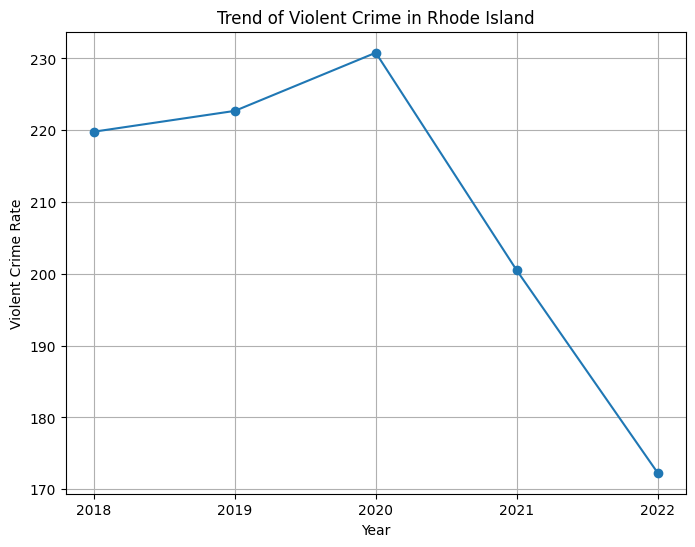

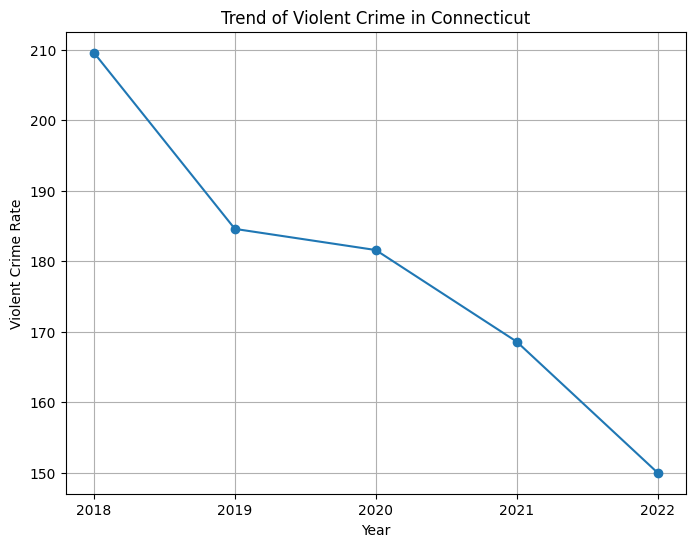

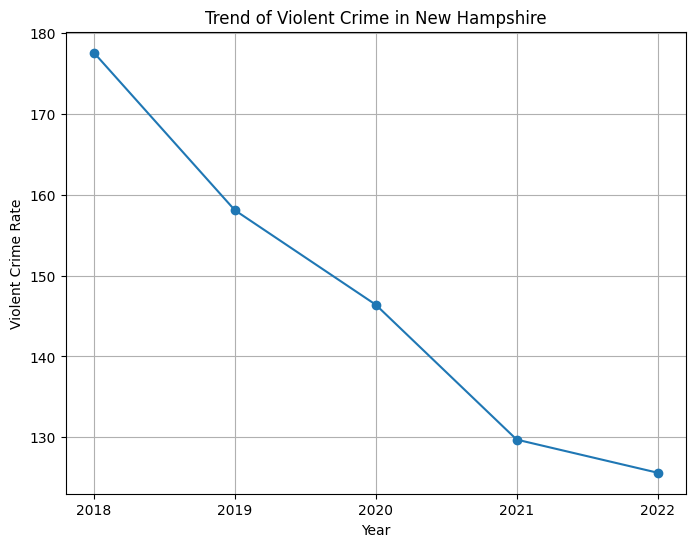

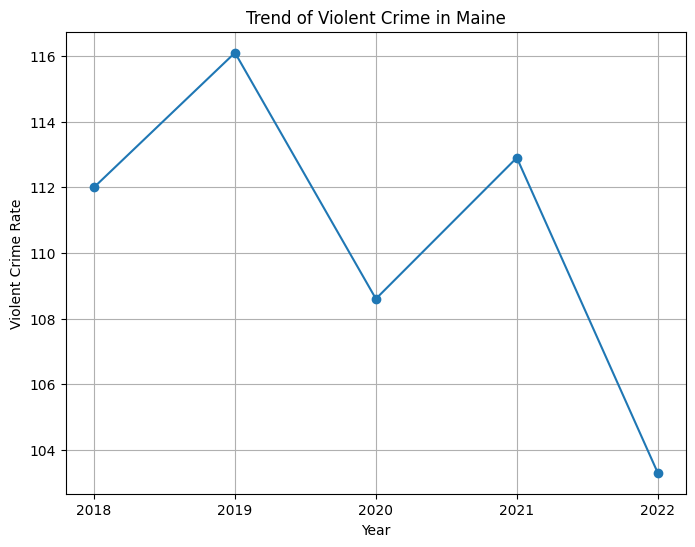

In [11]:
import matplotlib.pyplot as plt

# Transpose the DataFrame to have years as columns and states as index
df_transposed = df.T

# Iterate through each state
for state in df_transposed.columns:
  # Create a new plot for each state
  plt.figure(figsize=(8, 6))
  plt.plot(df_transposed.index, df_transposed[state], marker='o', linestyle='-')

  # Customize plot elements
  plt.title(f"Trend of Violent Crime in {state}")
  plt.xlabel("Year")
  plt.ylabel("Violent Crime Rate")
  plt.grid(True)
  plt.show()


# Q6. Which States had crime rates go down in 2020 vs. 2019?

There are 17 states in which the crime rates has gone down from 2019 to 2020 . The output shows the unique values of states where the crime went down in 2019 - 2020.

In [14]:
# Calculate the change in crime rates between 2020 and 2019
df['Crime Rate Change'] = df['2020'] - df['2019']

# Identifying states where the crime rate decreased
decreased_crime_states = df[df['Crime Rate Change'] < 0]


print(decreased_crime_states.index.unique(),decreased_crime_states.count())


Index(['New Mexico', 'Alaska', 'California', 'Nevada', 'Alabama', 'Maryland',
       'Washington', 'Oregon', 'Massachusetts', 'Indiana', 'Hawaii',
       'Virginia', 'Vermont', 'New Jersey', 'Connecticut', 'New Hampshire',
       'Maine'],
      dtype='object', name='Location') 2018                 17
2019                 17
2020                 17
2021                 17
2022                 17
Crime Rate Change    17
dtype: int64


# Q7. Compute the raw change between 2020 and 2019 for all States and print summary statistics.


The average crime rate change is 17.07, with a standard deviation of 35.79, reflecting a high variation in crime rate changes across the states. The minimum change is -54.5, representing the largest decrease, while the maximum is 104.3, showing the largest increase. The first quartile (25th percentile) is -6.38, meaning 25% of states experienced a crime rate change below this value. The median is 17.55, showing that half of the states have a crime rate change below this level, and the third quartile (75th percentile) is 38.23, with 75% of states falling below this value.

In [56]:

# Calculate the change in crime rates between 2020 and 2019
df['Crime Rate Change'] = df['2020'] - df['2019']

print(df)

print(df['Crime Rate Change'].describe())


                 2018   2019   2020   2021   2022  Crime Rate Change
Location                                                            
New Mexico      842.8  824.0  778.3  820.8  780.5              -45.7
Alaska          891.7  865.0  837.8  759.1  758.9              -27.2
Arkansas        561.6  580.8  671.9  702.4  645.3               91.1
Louisiana       543.3  559.7  639.4  662.7  628.6               79.7
Tennessee       630.4  598.9  672.7  671.8  621.6               73.8
California      447.5  442.1  442.0  481.2  499.5               -0.1
Colorado        401.5  384.6  423.1  480.4  492.5               38.5
South Carolina  500.8  510.1  530.7  513.8  491.3               20.6
Missouri        501.4  499.6  542.7  524.3  488.0               43.1
Michigan        452.5  438.6  478.0  491.1  461.0               39.4
Nevada          552.1  496.1  460.3  432.0  454.0              -35.8
Texas           412.9  421.8  446.5  453.0  431.9               24.7
Arizona         475.7  447.1  484.

# Q8. Make a nice boxplot or histogram for the output from Q7.

The histogram indicates that for most states, crime rates increased by 20-30 cases from 2019 to 2020. There was not a significant decrease in crime rates for the majority of states, as the number of states with reduced crime rates is relatively small. Overall, the trend shows that most states experienced an increase in crime rates during this period.

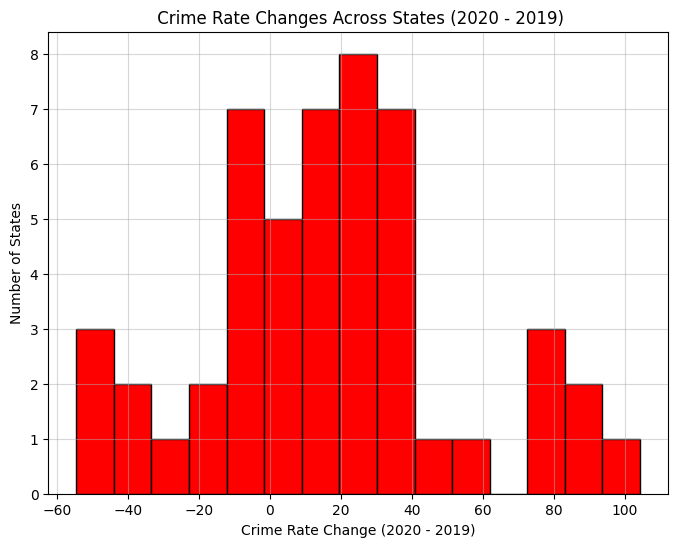

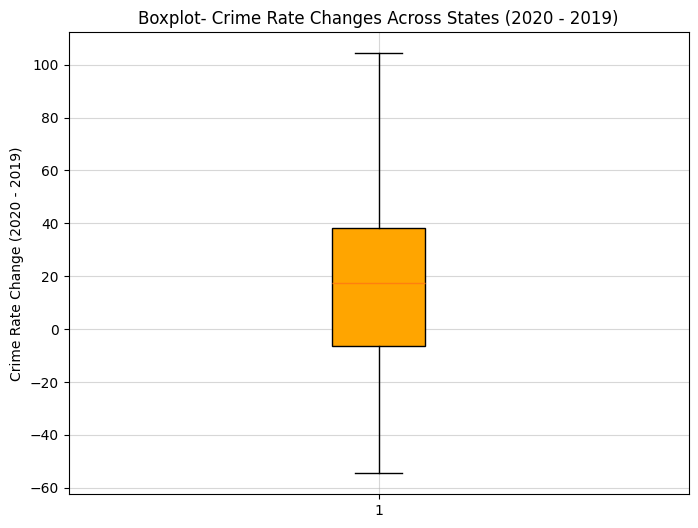

In [15]:
import matplotlib.pyplot as plt

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Crime Rate Change'], bins=15, color='red', edgecolor='black')
plt.xlabel('Crime Rate Change (2020 - 2019)')
plt.ylabel('Number of States')
plt.title(' Crime Rate Changes Across States (2020 - 2019)')
plt.grid(True, alpha=0.5)
plt.show()

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Crime Rate Change'], patch_artist=True, boxprops=dict(facecolor='orange'))
plt.ylabel('Crime Rate Change (2020 - 2019)')
plt.title('Boxplot- Crime Rate Changes Across States (2020 - 2019)')
plt.grid(True, alpha=0.5)
plt.show()


# Q9. Compute the percentage change between 2020 and 2019 for all States and print summary statistics

The statistics for the percentage change in crime rates show that the average change across all 50 states is around 4.66%, showing a slight increase in crime rates. Most states had changes close to this average. The smallest change was a decrease of -16.31%, while the largest was an increase of 27.29%. About half of the states experienced a change below 4.57%, while 25% of states had changes above 10.04%.

In [62]:
# Calculate the percentage change in crime rates between 2020 and 2019
df['Percentage Crime Rate Change'] = ((df['2020'] - df['2019']) / df['2019']) * 100

print(df)

print(df['Percentage Crime Rate Change'].describe())


                 2018   2019   2020   2021   2022  Crime Rate Change  \
Location                                                               
New Mexico      842.8  824.0  778.3  820.8  780.5              -45.7   
Alaska          891.7  865.0  837.8  759.1  758.9              -27.2   
Arkansas        561.6  580.8  671.9  702.4  645.3               91.1   
Louisiana       543.3  559.7  639.4  662.7  628.6               79.7   
Tennessee       630.4  598.9  672.7  671.8  621.6               73.8   
California      447.5  442.1  442.0  481.2  499.5               -0.1   
Colorado        401.5  384.6  423.1  480.4  492.5               38.5   
South Carolina  500.8  510.1  530.7  513.8  491.3               20.6   
Missouri        501.4  499.6  542.7  524.3  488.0               43.1   
Michigan        452.5  438.6  478.0  491.1  461.0               39.4   
Nevada          552.1  496.1  460.3  432.0  454.0              -35.8   
Texas           412.9  421.8  446.5  453.0  431.9               

# Q10. Make a nice boxplot or histogram for the output from Q9.

This histogram shows the distribution of percentage crime rate changes across states between 2019 and 2020. Most states experienced percentage changes close to 0%, with a noticeable concentration in the range of 0% to 10%, indicating minor increases in crime rates. The distribution is slightly skewed to the right, reflecting that increases in crime rates were more common than decreases during this period.

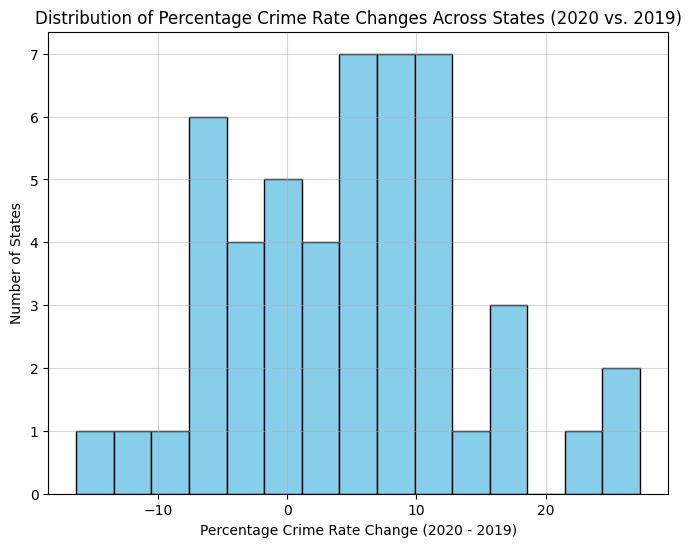

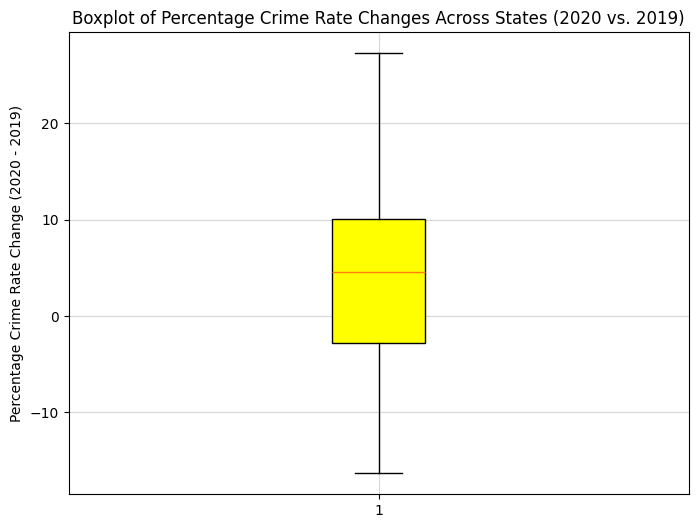

In [63]:
import matplotlib.pyplot as plt
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Percentage Crime Rate Change'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Percentage Crime Rate Change (2020 - 2019)')
plt.ylabel('Number of States')
plt.title('Distribution of Percentage Crime Rate Changes Across States (2020 vs. 2019)')
plt.grid(True, alpha=0.5)
plt.show()

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Percentage Crime Rate Change'], patch_artist=True, boxprops=dict(facecolor='yellow'))
plt.ylabel('Percentage Crime Rate Change (2020 - 2019)')
plt.title('Boxplot of Percentage Crime Rate Changes Across States (2020 vs. 2019)')
plt.grid(True, alpha=0.5)
plt.show()
